In [1]:
# Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


In [193]:
# Read in the dataset from the csv file
df = pd.read_csv("Resources/prices.csv")

In [194]:
# Set the date to the index of the dataframe
df['date'] = pd.to_datetime(df.date,format='%Y-%m-%d')
df.set_index('symbol', inplace=True)
df = df.sort_values('date')

# Build in arrary of the Stock tickers
tickers = df.index.unique()
tickers

Index(['SYMC', 'IFF', 'ILMN', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'IDXX',
       ...
       'NAVI', 'QRVO', 'CFG', 'WRK', 'KHC', 'PYPL', 'HPE', 'CSRA', 'WLTW',
       'FTV'],
      dtype='object', name='symbol', length=501)

In [195]:
# Select a random set of 50 numbers
sample_num = random.sample(range(0, 501), 50)

In [196]:
# Build train samples of stocks using the random numbers to select tickers
train_tickers = []
for num in sample_num:
    train_tickers.append(tickers[num])

In [197]:
# Build and Compile Sixty Day Time Step Model
model_sixty_day = Sequential()
model_sixty_day.add(LSTM(units=50, return_sequences=True, input_shape=(60,5)))
model_sixty_day.add(LSTM(units=50))
model_sixty_day.add(Dense(1))
model_sixty_day.compile(loss='mean_squared_error', optimizer='adam')

In [198]:
# Build and Compile the Thirty Day Time Step Model
model_thirty_day = Sequential()
model_thirty_day.add(LSTM(units=50, return_sequences=True, input_shape=(30,5)))
model_thirty_day.add(LSTM(units=50))
model_thirty_day.add(Dense(1))
model_thirty_day.compile(loss='mean_squared_error', optimizer='adam')

In [199]:
# Build and Compile the Ten Day Time Step Model
model_ten_day = Sequential()
model_ten_day.add(LSTM(units=50, return_sequences=True, input_shape=(10,5)))
model_ten_day.add(LSTM(units=50))
model_ten_day.add(Dense(1))
model_ten_day.compile(loss='mean_squared_error', optimizer='adam')

In [200]:
for stock in train_tickers:
    train_df = df.loc[stock, :]
    train_df.set_index('date', inplace=True)
    x_df = MSFT_df
    y_df = MSFT_df[['close']]
    x_scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaler = MinMaxScaler(feature_range=(0, 1))
    x_train_dataset = x_df.values
    y_train_dataset = y_df.values
    x_scaled_data = x_scaler.fit_transform(x_train_dataset)
    y_scaled_data = y_scaler.fit_transform(y_train_dataset)
    x_train, y_train = [], []
    for i in range(60, len(MSFT_df)):
        x_train.append(x_scaled_data[i-60:i, :])
        y_train.append(y_scaled_data[i, :])
    x_train, y_train = np.array(x_train), np.array(y_train)
    model_sixty_day.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 74s - loss: 0.0020
Epoch 1/1
 - 72s - loss: 8.7484e-04
Epoch 1/1
 - 63s - loss: 4.9608e-04
Epoch 1/1
 - 63s - loss: 4.2352e-04
Epoch 1/1
 - 63s - loss: 4.2805e-04
Epoch 1/1
 - 64s - loss: 4.1688e-04
Epoch 1/1
 - 66s - loss: 3.5120e-04
Epoch 1/1
 - 63s - loss: 3.9004e-04
Epoch 1/1
 - 63s - loss: 3.4725e-04
Epoch 1/1
 - 63s - loss: 3.3549e-04
Epoch 1/1
 - 62s - loss: 3.3613e-04
Epoch 1/1
 - 72s - loss: 3.2969e-04
Epoch 1/1
 - 68s - loss: 3.4123e-04
Epoch 1/1
 - 62s - loss: 3.0585e-04
Epoch 1/1
 - 62s - loss: 3.1500e-04
Epoch 1/1
 - 64s - loss: 3.1505e-04
Epoch 1/1
 - 63s - loss: 2.9837e-04
Epoch 1/1
 - 63s - loss: 2.9142e-04
Epoch 1/1
 - 63s - loss: 2.8189e-04
Epoch 1/1
 - 65s - loss: 2.9631e-04
Epoch 1/1
 - 67s - loss: 2.8688e-04
Epoch 1/1
 - 64s - loss: 2.8034e-04
Epoch 1/1
 - 64s - loss: 2.8808e-04
Epoch 1/1
 - 64s - loss: 2.9071e-04
Epoch 1/1
 - 67s - loss: 2.9157e-04
Epoch 1/1
 - 66s - loss: 2.7941e-04
Epoch 1/1
 - 64s - loss: 2.7257e-04
Epoch 1/1
 - 64s - loss: 2.8422e

In [201]:
for stock in train_tickers:
    train_df = df.loc[stock, :]
    train_df.set_index('date', inplace=True)
    x_df = MSFT_df
    y_df = MSFT_df[['close']]
    x_scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaler = MinMaxScaler(feature_range=(0, 1))
    x_train_dataset = x_df.values
    y_train_dataset = y_df.values
    x_scaled_data = x_scaler.fit_transform(x_train_dataset)
    y_scaled_data = y_scaler.fit_transform(y_train_dataset)
    x_train, y_train = [], []
    for i in range(30, len(MSFT_df)):
        x_train.append(x_scaled_data[i-30:i, :])
        y_train.append(y_scaled_data[i, :])
    x_train, y_train = np.array(x_train), np.array(y_train)
    model_thirty_day.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 34s - loss: 0.0020
Epoch 1/1
 - 31s - loss: 7.2707e-04
Epoch 1/1
 - 32s - loss: 5.7895e-04
Epoch 1/1
 - 32s - loss: 4.4393e-04
Epoch 1/1
 - 32s - loss: 4.1448e-04
Epoch 1/1
 - 32s - loss: 4.2165e-04
Epoch 1/1
 - 32s - loss: 3.7907e-04
Epoch 1/1
 - 32s - loss: 3.9378e-04
Epoch 1/1
 - 32s - loss: 3.4883e-04
Epoch 1/1
 - 32s - loss: 3.1108e-04
Epoch 1/1
 - 32s - loss: 3.3160e-04
Epoch 1/1
 - 32s - loss: 3.1798e-04
Epoch 1/1
 - 32s - loss: 3.3297e-04
Epoch 1/1
 - 32s - loss: 3.1104e-04
Epoch 1/1
 - 32s - loss: 2.9971e-04
Epoch 1/1
 - 32s - loss: 3.0625e-04
Epoch 1/1
 - 32s - loss: 3.1244e-04
Epoch 1/1
 - 32s - loss: 3.0128e-04
Epoch 1/1
 - 32s - loss: 2.7452e-04
Epoch 1/1
 - 34s - loss: 2.8060e-04
Epoch 1/1
 - 32s - loss: 2.7907e-04
Epoch 1/1
 - 32s - loss: 2.8337e-04
Epoch 1/1
 - 32s - loss: 2.8389e-04
Epoch 1/1
 - 32s - loss: 2.9974e-04
Epoch 1/1
 - 32s - loss: 2.7807e-04
Epoch 1/1
 - 32s - loss: 2.8061e-04
Epoch 1/1
 - 32s - loss: 2.7873e-04
Epoch 1/1
 - 32s - loss: 2.7154e

In [202]:
for stock in train_tickers:
    train_df = df.loc[stock, :]
    train_df.set_index('date', inplace=True)
    x_df = MSFT_df
    y_df = MSFT_df[['close']]
    x_scaler = MinMaxScaler(feature_range=(0, 1))
    y_scaler = MinMaxScaler(feature_range=(0, 1))
    x_train_dataset = x_df.values
    y_train_dataset = y_df.values
    x_scaled_data = x_scaler.fit_transform(x_train_dataset)
    y_scaled_data = y_scaler.fit_transform(y_train_dataset)
    x_train, y_train = [], []
    for i in range(10, len(MSFT_df)):
        x_train.append(x_scaled_data[i-10:i, :])
        y_train.append(y_scaled_data[i, :])
    x_train, y_train = np.array(x_train), np.array(y_train)
    model_ten_day.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 15s - loss: 0.0027
Epoch 1/1
 - 13s - loss: 8.6610e-04
Epoch 1/1
 - 13s - loss: 6.7875e-04
Epoch 1/1
 - 13s - loss: 5.3178e-04
Epoch 1/1
 - 13s - loss: 4.2386e-04
Epoch 1/1
 - 13s - loss: 3.5075e-04
Epoch 1/1
 - 13s - loss: 4.0745e-04
Epoch 1/1
 - 13s - loss: 3.4685e-04
Epoch 1/1
 - 14s - loss: 3.6359e-04
Epoch 1/1
 - 13s - loss: 3.2608e-04
Epoch 1/1
 - 13s - loss: 3.3119e-04
Epoch 1/1
 - 13s - loss: 3.6051e-04
Epoch 1/1
 - 13s - loss: 2.8924e-04
Epoch 1/1
 - 13s - loss: 3.2466e-04
Epoch 1/1
 - 13s - loss: 3.0742e-04
Epoch 1/1
 - 13s - loss: 3.2827e-04
Epoch 1/1
 - 13s - loss: 3.1981e-04
Epoch 1/1
 - 13s - loss: 2.9922e-04
Epoch 1/1
 - 13s - loss: 2.7266e-04
Epoch 1/1
 - 13s - loss: 2.8492e-04
Epoch 1/1
 - 13s - loss: 2.8126e-04
Epoch 1/1
 - 13s - loss: 3.0319e-04
Epoch 1/1
 - 13s - loss: 2.8455e-04
Epoch 1/1
 - 13s - loss: 2.8566e-04
Epoch 1/1
 - 13s - loss: 2.6970e-04
Epoch 1/1
 - 13s - loss: 2.6886e-04
Epoch 1/1
 - 13s - loss: 2.7550e-04
Epoch 1/1
 - 13s - loss: 2.8020e

In [168]:
MSFT_df = df.loc['MSFT', :]
MSFT_df.set_index('date', inplace=True)
x_df = MSFT_df
y_df = MSFT_df[['close']]
x_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_dataset = x_df.values
y_train_dataset = y_df.values
x_scaled_data = x_scaler.fit_transform(x_train_dataset)
y_scaled_data = y_scaler.fit_transform(y_train_dataset)
x_train, y_train = [], []
for i in range(30, len(MSFT_df)):
    x_train.append(x_scaled_data[i-30:i, :])
    y_train.append(y_scaled_data[i, :])
x_train, y_train = np.array(x_train), np.array(y_train)

In [170]:
y_pred = model_thirty_day.predict(x_train)

In [171]:
close_pred = y_scaler.inverse_transform(y_pred)
close = y_scaler.inverse_transform(y_train)

In [173]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(close, close_pred)
mse

0.8974978591695024

In [174]:
(close-close_pred).mean()

0.6799361077553837

In [175]:
valid = (MSFT_df[30:])
valid['pred'] = close_pred

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [112]:
x_train[1751]

array([[0.97202456, 0.97439062, 0.97271384, 0.97670436, 0.06194849],
       [0.97815953, 0.96749569, 0.96828906, 0.97179997, 0.10949692],
       [0.96858898, 1.        , 0.97566367, 0.99190785, 0.08339629],
       [0.99631899, 0.99803009, 0.99065878, 0.99264348, 0.0566688 ],
       [0.98993865, 0.99803009, 0.99287117, 0.99019134, 0.02793975],
       [1.        , 0.99827629, 1.        , 1.        , 0.04427994],
       [0.99042947, 0.99064277, 0.98500489, 0.98626785, 0.01284687],
       [0.98453985, 0.99162768, 0.99508355, 0.99926439, 0.01078646],
       [0.9892025 , 0.98448665, 0.98574243, 0.98283482, 0.02008213],
       [0.97595094, 0.98227045, 0.98328417, 0.97793043, 0.00592136]])

In [132]:
current = []
for i in range(0, 10):
    current.append(x_scaled_data[i-10])
x_current = np.array(current)
x_current = np.reshape(x_current, (1,) + x_current.shape)
x_current.shape

(1, 10, 5)

In [133]:
current_predict = model_ten_day.predict(x_current)

In [134]:
current_predict

array([[0.9528681]], dtype=float32)

In [55]:
a, b = [], []
for i in range(5, 20):
    a.append(i-5)
    b.append(i)
print(a)
print(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [21]:
MSFT_df = df.loc['MSFT', :]
MSFT_df.set_index('date', inplace=True)
MSFT_df.drop('open', axis=1, inplace=True)
dataset = MSFT_df.values
x_scaler = MinMaxScaler(feature_range=(0, 1))
y_scaler
scaled_data = scaler.fit_transform(dataset)
X_test, y_test = [], []
for i in range(10,len(MSFT_df)):
    X_test.append(scaled_data[i-10:i,0:4])
    y_test.append(scaled_data[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)

C:\Users\kreit\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
y_test = y_test.reshape(-1, 1)
y_test

array([[0.19921202],
       [0.18665354],
       [0.17237134],
       ...,
       [0.98448665],
       [0.98227045],
       [0.96355577]])

In [11]:
X_test.shape

(1752, 10, 4)

In [23]:
y_predict = scaler.inverse_transform(y_test)

ValueError: non-broadcastable output operand with shape (1752,1) doesn't match the broadcast shape (1752,4)

In [31]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(y_test, y_predict)

In [32]:
error

0.00021859023362960587

In [33]:
len(y_predict)

1752

In [34]:
valid = MSFT_df[10:]
len(valid)

1752

In [162]:
valid.head()

,open,close,low,high,volume,pred
date,,,,,,
2010-01-19,30.750000,31.100000,30.680000,31.240000,46575700.0,30.308275
2010-01-20,30.809999,30.590000,30.309999,30.940001,54849500.0,30.329866
2010-01-21,30.610001,30.010000,30.000000,30.719999,73086700.0,29.923618
2010-01-22,30.000000,28.959999,28.840000,30.200001,102004600.0,29.549763
2010-01-25,29.240000,29.320000,29.100000,29.660000,63373000.0,28.589338


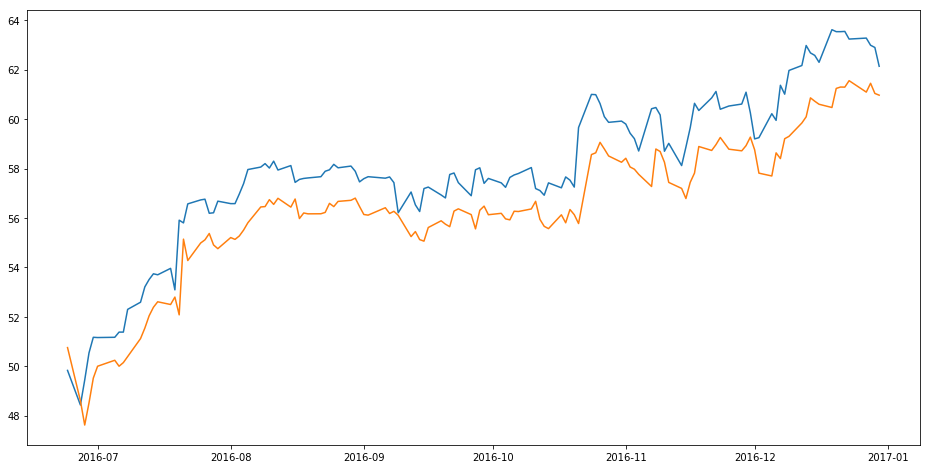

In [176]:

plt.figure(figsize=(16,8))

valid = valid[1600:]
#plt.plot(train['close'])
plt.plot(valid[['close','pred']])

In [ ]:
valid['error'] = valid['close'] - valid['predictions']

In [ ]:
valid['error'].mean()

In [203]:
model_sixty_day.save('model_sixty_day.h5')

In [204]:
model_thirty_day.save('model_thirty_day.h5')

In [205]:
model_ten_day.save('model_ten_day.h5')